# DIABETICS PREDICTION

IN this project we are going to predict whether the person is having diabets from input_data

0-the person is nondiabetic

1- the person is diabetic

In [1]:
#control flow of the process

data---data preprocessing----data analysis---train and testsplit---building and training model---prediction

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('C:\\Users\\pavan\\Desktop\\data science course\\project\\project on classifier\\project file')

In [5]:
#data preprocessing

In [4]:
data=pd.read_csv('project 2 diabetes.csv')

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#finding number of rows and columns

In [6]:
data.shape

(768, 9)

In [6]:
#data cleaning

In [8]:
#finding missing values in the data

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#since there are no missing values

In [8]:
##exploratory data analysing(EDA)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
#data visualisation


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

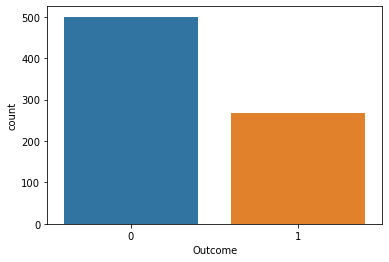

In [11]:
sns.countplot('Outcome',data=data)

In [13]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
#from above understanding we can say that
#if glucose level and Insulin is less than nondiabetic(109,68)
#if glucose level and Insulin is high then diabetic(141,100)

In [15]:
#splittiing the dataset

In [16]:
y=data.Outcome
X=data.drop(columns='Outcome',axis=1)

In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


data standardization--in some cases we stndardize the data into a particular range so that
that hepls our machine learning model for better prediction.

since outliers in 5th column is to much so we need to standardize

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
#fitting the data

In [21]:
scaler.fit(X)

StandardScaler()

In [22]:
Std_data=scaler.transform(X)

In [23]:
print(Std_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [24]:
X=Std_data

In [25]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [26]:
#splitting the data into train and test

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [28]:
X_train

array([[-0.84488505,  1.84983245, -3.57259724, ...,  1.43512945,
        -0.57344897,  0.66020563],
       [ 1.23388019,  1.06740381, -0.36733675, ...,  0.25478047,
         0.21480201,  1.08564439],
       [ 0.93691372, -0.21577915, -0.16054575, ...,  0.10247738,
        -0.64593181,  0.74529338],
       ...,
       [-0.84488505,  0.7857295 , -0.67752325, ..., -0.29097229,
         0.2782245 , -0.36084741],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393],
       [-0.54791859, -0.8730192 , -0.26394125, ...,  0.76245745,
         0.61043756, -0.87137393]])

In [29]:
X_test

array([[ 1.23388019, -1.12339636, -0.729221  , ..., -0.96364429,
        -1.01438629,  0.74529338],
       [ 0.04601433, -0.90431634,  0.56322275, ...,  1.29551828,
        -0.70935431, -0.36084741],
       [-0.54791859, -0.68523633, -0.47073225, ...,  0.58477051,
        -0.05700867, -1.04154944],
       ...,
       [ 0.3429808 , -1.09209922, -0.05715025, ..., -0.22751266,
        -0.32579923, -0.78628618],
       [-0.25095213, -0.77912776,  0.45982725, ...,  0.67361398,
        -0.70633419,  0.57511787],
       [-1.14185152, -0.84172205,  0.04624525, ...,  1.4605133 ,
        -0.37714125, -1.04154944]])

In [30]:
y_train

332    1
111    1
64     1
742    0
101    0
      ..
735    0
475    0
46     0
767    0
709    1
Name: Outcome, Length: 614, dtype: int64

In [31]:
y_test

194    0
350    0
738    0
629    0
6      1
      ..
486    0
339    1
457    0
504    0
623    0
Name: Outcome, Length: 154, dtype: int64

In [32]:
#building the model(model1)
#support vector machine classifier

In [33]:
from sklearn import svm
svmc=svm.SVC(kernel='linear')
svmc.fit(X_train,y_train)

SVC(kernel='linear')

In [34]:
#training


In [35]:
y1_predict=svmc.predict(X_test)
z1_predict=svmc.predict(X_train)

In [36]:
y1_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [37]:
z1_predict

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

# evaluation

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       100
           1       0.80      0.67      0.73        54

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



<AxesSubplot:>

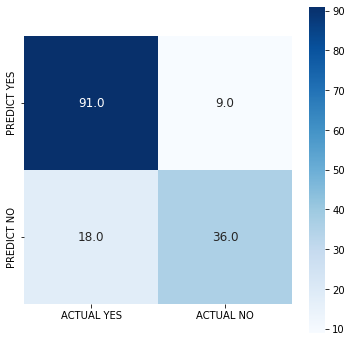

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y1_predict))
cf=pd.DataFrame(confusion_matrix(y_test,y1_predict),columns=['ACTUAL YES','ACTUAL NO'],index=['PREDICT YES','PREDICT NO'])
plt.figure(figsize=(6,6))
sns.heatmap(cf,cbar=True,square=True,annot=True,annot_kws={'size':12},fmt='0.1f',cmap='Blues')

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y1_predict)

0.8246753246753247

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,z1_predict)

0.7654723127035831

In [44]:
#building the model (model2)
#LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
y2_predict=model.predict(X_test)
z2_predict=model.predict(X_train)

In [47]:
y2_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [48]:
z2_predict

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       100
           1       0.76      0.69      0.72        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



<AxesSubplot:>

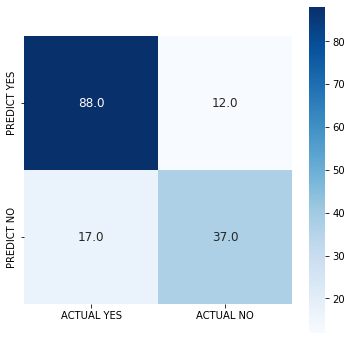

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y2_predict))
cf2=pd.DataFrame(confusion_matrix(y_test,y2_predict),columns=['ACTUAL YES','ACTUAL NO'],index=['PREDICT YES','PREDICT NO'])
plt.figure(figsize=(6,6))
sns.heatmap(cf2,cbar=True,square=True,annot=True,annot_kws={'size':12},fmt='0.1f',cmap='Blues')

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y2_predict)

0.8116883116883117

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,z2_predict)

0.7638436482084691

In [52]:
#building the model (model3)
#DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
#training the model


In [55]:
y3_predict=dtree.predict(X_test)
z3_predict=dtree.predict(X_train)

In [56]:
y3_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [57]:
z3_predict

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       100
           1       0.52      0.59      0.55        54

    accuracy                           0.66       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.68      0.66      0.67       154



<AxesSubplot:>

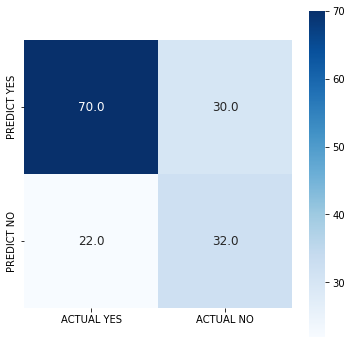

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y3_predict))
cf3=pd.DataFrame(confusion_matrix(y_test,y3_predict),columns=['ACTUAL YES','ACTUAL NO'],index=['PREDICT YES','PREDICT NO'])
plt.figure(figsize=(6,6))
sns.heatmap(cf3,cbar=True,square=True,annot=True,annot_kws={'size':12},fmt='0.1f',cmap='Blues')

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y3_predict)

0.6623376623376623

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,z3_predict)

1.0

In [65]:
#evaluation

In [62]:
#building the model(model4)
#RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [64]:
y4_predict=rfc.predict(X_test)
z4_predict=rfc.predict(X_train)

In [65]:
y4_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [66]:
z4_predict

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       100
           1       0.69      0.74      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.80      0.79      0.79       154



<AxesSubplot:>

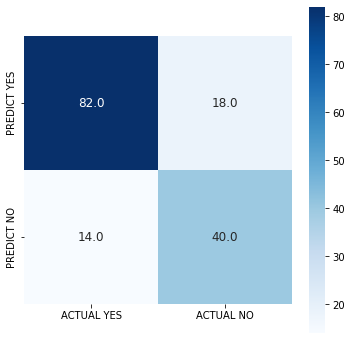

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y4_predict))
cf4=pd.DataFrame(confusion_matrix(y_test,y4_predict),columns=['ACTUAL YES','ACTUAL NO'],index=['PREDICT YES','PREDICT NO'])
plt.figure(figsize=(6,6))
sns.heatmap(cf4,cbar=True,square=True,annot=True,annot_kws={'size':12},fmt='0.1f',cmap='Blues')

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y4_predict)

0.7922077922077922

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,z4_predict)

1.0

In [76]:
table={'model':['LogisticRegression','DesicionTreeClassifier','support vector machine classifier','RandomForest Classifier'],
      'accuracy(X_train)':[0.763,1.0,0.765,1.0],
      'accuracy(X_test)':[0.811,0.66,0.824,0.792]}

In [77]:
pd.DataFrame(table)

,model,accuracy(X_train),accuracy(X_test)
0,LogisticRegression,0.763,0.811
1,DesicionTreeClassifier,1.000,0.642
2,support vector machine classifier,0.765,0.824
3,RandomForest Classifier,1.000,0.758


In [ ]:
since logistic model accuracy between the train and test data has better accuracy,
using Logistic Regression for building a prediction  system

In [72]:
input_data1=(6,148,72,35,0,33.6,0.627,50)
#changing the dataset in array
input_data_np_array1=np.asarray(input_data1)
#reshaping the input_data
data_reshaped1=input_data_np_array1.reshape(1,-1)

print(data_reshaped1)

std2_data=scaler.transform(data_reshaped1)
print(std2_data)
prediction1=model.predict(std2_data)
print(prediction1)

if (prediction1[0]==0):
    print('the patient is non-diabetic')
else:
        print('the patient is diabetic')


[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]]
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
the patient is diabetic


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
y_test[0]

1

In [74]:
#so both prediction and y_test are giving same value